In [2]:
import pandas as pd

In [3]:
#! /Users/annieulichney/opt/anaconda3/bin/python -m pip install git+https://github.com/SciTools/cartopy.git

## Questions

- How is the data formatted? Where is it from? 
- What is nearest neighbor forest loss? 
- What is forest diff? 
- What do the variable values mean? Some that seem to be categorical have numerical data? 
- What is aspect?
- Suggestions for next steps? 

## Variables

- "FID": unique id for each pixel
- "x": longitude
- "y": latitude, 
- "year": year,
- "forest.l": forest loss,
- "nn_forest.l": neigherst neighbor forest loss,

- "rain1": rainfall,
- "elevation": elevation (meters above sea level),
- "slope": slope,
- "aspect": aspect,
- "near_mines": distance to nearest mine,
- "near_roads": distance to nearest road,
- "near_hidrovia": distance to nearest hydroeletric,

- "indigenous_homol": pixel is inside an indigenous, homologated territory
- "mun_election_year": municipal election year,
- "new_forest_code": years after new forest code (post 2012),
- "lula": Lula government years (2003-2010),
- "dilma": Dilma government yeras (2011-2016),
- "temer": Temer interim government (2017-2018),
- "bolsonaro": Bolsonaro government (2019-2020),
- "fed_election_year": Years where there was a Federal Election 

- "populacao": Population (I think this is census data so 2000 and 2010),
- "pib_pc": GDP per capita,

- "ironore": whether the municipality produces ironore,
- "silver": whether the municipality produces silver,
- "copper": whether the municipality produces copper,
- "gold": whether the municipality produces gold,

- "soy_price": whether the municipality produces soy,
- "beef_price": whether the municipality produces beef,

- "ag_jobs": total employment in the agricultural sector,
- "mining_jobs": total employment in the mining sector,
- "public_jobs": total employment in the public sector,
- "construction_jobs": total employment in the construction sector

## Brazil Area Data

In [4]:
fileBrazil = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/Brazil.csv'
dataBrazil = pd.read_csv(fileBrazil)

dataBrazil.head()

OSError: [Errno 89] Operation canceled

In [ ]:
print(dataBrazil.columns.values)

## Commmodity Price Data

In [ ]:
fileComm = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/commodity_prices.xlsx'
dataComm = pd.read_excel(fileComm)

dataComm.head()

## Farm Price Data

In [ ]:
fileFarm = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/farm_price_index.xlsx'
dataFarm = pd.read_excel(fileFarm)

dataFarm.head()

## Complete Data

In [7]:
fileBraz = '/Users/annieulichney/Desktop/Deforestation/forest_full.csv'
df = pd.read_csv(fileBraz, nrows = 10000)

df = df.drop('Unnamed: 0', axis = 1)

df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,ironore,silver,copper,gold,soy_price,beef_price,ag_jobs,mining_jobs,public_jobs,construction_jobs
0,1100015,0,8436645,-62.825,-12.925,2002,97,85.50,21.81664,154,...,29.309999,147894.59375,1559.47998,9965846,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
1,1100015,16,8436646,-62.825,-12.875,2002,65,68.75,22.56391,146,...,29.309999,147894.59375,1559.47998,9965846,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
2,1100015,5,8440244,-62.775,-12.975,2002,92,87.75,21.30135,156,...,29.309999,147894.59375,1559.47998,9965846,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
3,1100015,9,8440245,-62.775,-12.925,2002,83,73.75,22.10585,156,...,29.309999,147894.59375,1559.47998,9965846,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
4,1100015,13,8443844,-62.725,-12.975,2002,79,80.25,20.90614,155,...,29.309999,147894.59375,1559.47998,9965846,188.86617,95.403771,15.347222,1.458333,44.791667,1.875


In [8]:
df.shape

(10000, 35)

In [10]:
#create file that contains all variables in the dataset, write to text file since there are many

var_list = df.columns.values.tolist()
textfile = open("var_list.txt", "w")

for element in var_list:
    textfile.write(element + ': '+"\n")
textfile.close()

## Analysis and Visualization

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [16]:
df

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,ironore,silver,copper,gold,soy_price,beef_price,ag_jobs,mining_jobs,public_jobs,construction_jobs
0,1,1100015,-2,8451045,-62.625,-12.925,2002,41,47.25,21.63735,...,29.309999,147894.59375,1559.479980,9965846,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
1,2,1100015,-16,8454647,-62.575,-12.825,2002,66,64.75,23.32426,...,29.309999,147894.59375,1559.479980,9965846,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
2,3,1100015,-4,8472646,-62.325,-13.075,2002,97,88.00,19.14216,...,29.309999,147894.59375,1559.479980,9965846,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
3,4,1100015,-3,8472656,-62.325,-12.575,2002,97,92.25,25.32635,...,29.309999,147894.59375,1559.479980,9965846,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
4,5,1100015,0,8479854,-62.225,-12.825,2002,97,94.75,22.15771,...,29.309999,147894.59375,1559.479980,9965846,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1100122,18,8501502,-61.925,-10.625,2004,30,39.00,29.69834,...,37.900002,214125.65625,2865.879883,13156510,276.632995,113.907083,13.268015,2.256637,14.020228,3.552465
9996,9997,1100122,-7,8501515,-61.925,-9.975,2004,77,91.00,27.15150,...,37.900002,214125.65625,2865.879883,13156510,276.632995,113.907083,13.268015,2.256637,14.020228,3.552465
9997,9998,1100122,-7,8505102,-61.875,-10.875,2004,28,26.25,30.60852,...,37.900002,214125.65625,2865.879883,13156510,276.632995,113.907083,13.268015,2.256637,14.020228,3.552465
9998,9999,1100122,-10,8505103,-61.875,-10.825,2004,45,30.75,30.83375,...,37.900002,214125.65625,2865.879883,13156510,276.632995,113.907083,13.268015,2.256637,14.020228,3.552465


In [48]:
df.describe()

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,ironore,silver,copper,gold,soy_price,beef_price,ag_jobs,mining_jobs,public_jobs,construction_jobs
count,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.083608e+06,0.127400,8.776752e+06,-58.104020,-6.189400,2002.514100,75.175800,75.023750,29.071329,...,30.696683,152951.890145,1680.124215,1.084856e+07,211.643970,92.755246,17.989995,1.780953,42.226733,2.611246
std,2886.89568,1.416954e+06,9.538442,5.071346e+05,7.042479,4.917478,0.517328,27.793315,26.708934,7.117618,...,1.480898,7327.364541,156.791657,8.843586e+05,22.906396,3.461195,22.209586,4.579752,31.272712,7.522457
min,1.00000,1.100015e+06,-65.000000,7.655367e+06,-73.675000,-17.975000,2002.000000,0.000000,2.000000,10.401470,...,29.309999,147894.593750,1559.479980,9.965846e+06,188.866170,89.735417,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.302306e+06,-3.000000,8.393538e+06,-63.425000,-9.825000,2002.000000,58.000000,59.937500,24.503025,...,29.309999,147894.593750,1559.479980,9.965846e+06,188.866170,89.735417,0.000000,0.000000,16.965227,0.000000
50%,5000.50000,1.500701e+06,0.000000,8.793286e+06,-57.875000,-6.125000,2003.000000,89.000000,88.250000,28.453835,...,31.950001,156896.890625,1779.140015,1.168721e+07,233.187498,95.403771,8.474576,0.000000,39.965157,0.000000
75%,7500.25000,1.712405e+06,3.000000,9.182016e+06,-52.475000,-2.375000,2003.000000,97.000000,95.250000,33.283963,...,31.950001,156896.890625,1779.140015,1.168721e+07,233.187498,95.403771,30.747462,1.010989,69.010989,1.798202
max,10000.00000,5.108956e+06,59.000000,9.786970e+06,-44.075000,5.025000,2004.000000,97.000000,97.000000,59.198070,...,37.900002,214125.656250,2865.879883,1.315651e+07,276.632995,113.907083,100.000000,75.925926,100.000000,82.142857


### Year

In [41]:
np.unique(df['year'])

array([2002, 2003, 2004])

Text(0.5, 1.0, 'Year Histogram')

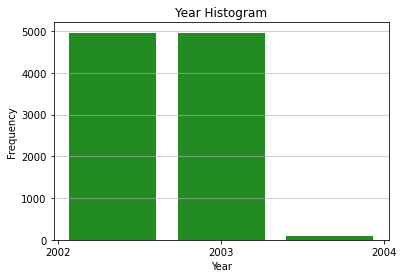

In [56]:
plt.hist(x = df['year'], bins = 3, color = 'forestgreen', rwidth = 0.8)
plt.grid(axis = 'y', alpha = 0.75)
plt.xticks(np.unique(df['year']))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year Histogram')

In [59]:
df['year'].value_counts()

2003    4963
2002    4948
2004      89
Name: year, dtype: int64

In [63]:
np.unique(df['soy_price'])

array([188.8661704 , 233.18749838, 276.63299471])

### Forest Loss


In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'Forest Loss Histogram')

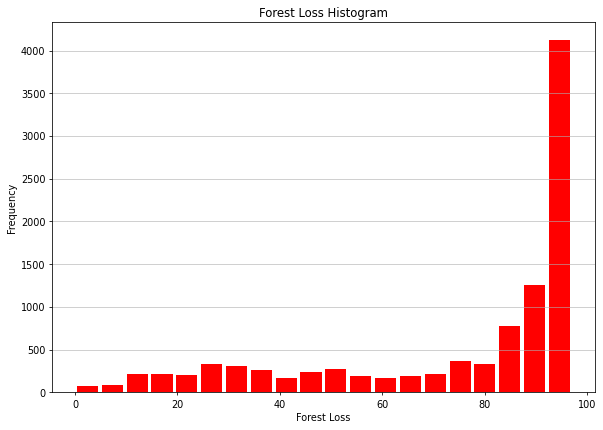

In [133]:
#Forest loss scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['forest.l'], bins = 20, color = 'red', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Forest Loss')
plt.ylabel('Frequency')
plt.title('Forest Loss Histogram')

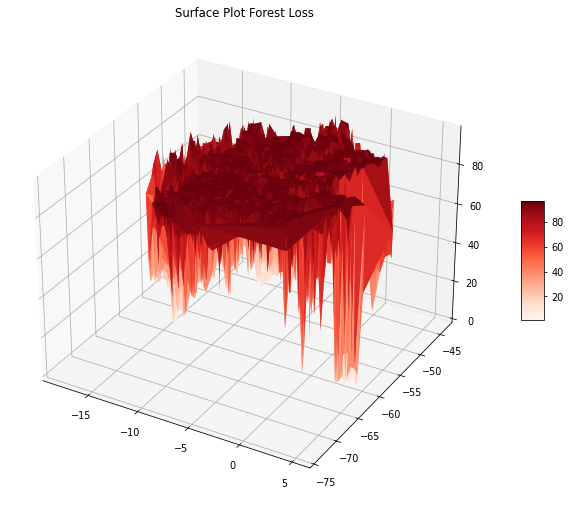

In [91]:
#forest loss 3d plot
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['forest.l'], cmap = plt.get_cmap('Reds'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Forest Loss')
 

plt.show()

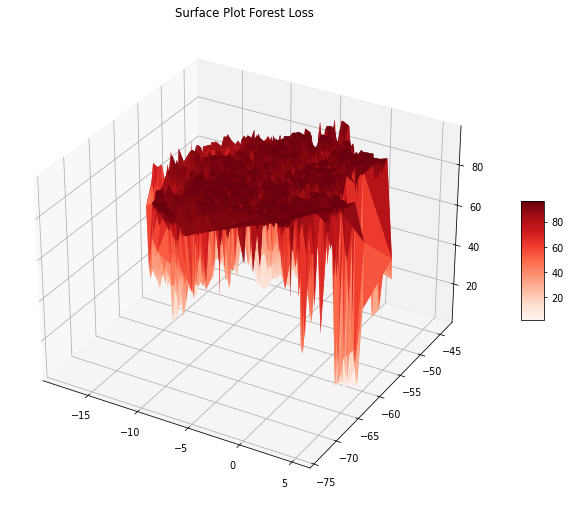

In [100]:
#forest loss 3d plot with nearest neighbor
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['nn_forest.l'], cmap = plt.get_cmap('Reds'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Forest Loss Nearest Neighbor')

plt.show()

Text(0.5, 1.0, 'Scatterplot Forest Loss')

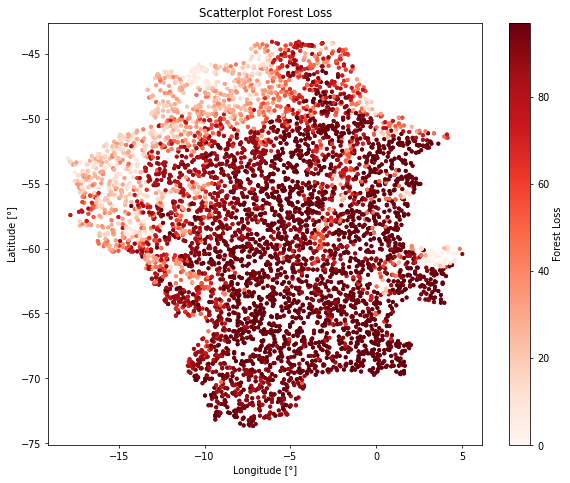

In [166]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['forest.l'], cmap = plt.get_cmap('Reds'))
plt.colorbar(label = 'Forest Loss')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Forest Loss')

### Near Mines

Text(0.5, 1.0, 'Near Mines Histogram')

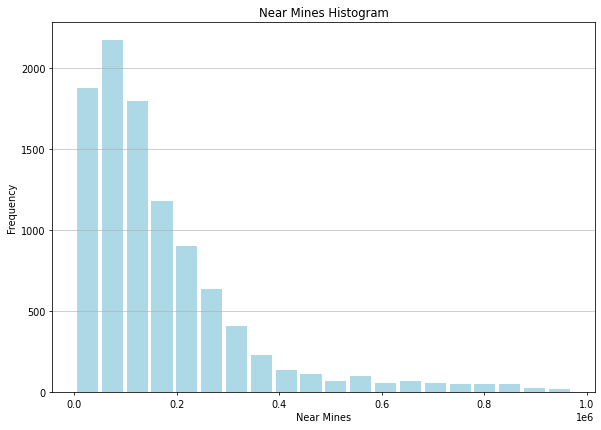

In [136]:
#Near Mines scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['near_mines'], bins = 20, color = 'lightblue', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Near Mines')
plt.ylabel('Frequency')
plt.title('Near Mines Histogram')

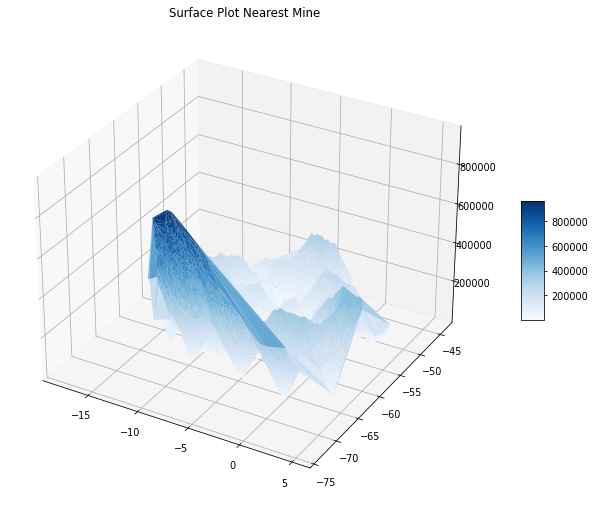

In [126]:
#Near mines
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['near_mines'], cmap = plt.get_cmap('Blues'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Nearest Mine')
 

plt.show()

Text(0.5, 1.0, 'Scatterplot Distance To Nearest Mine')

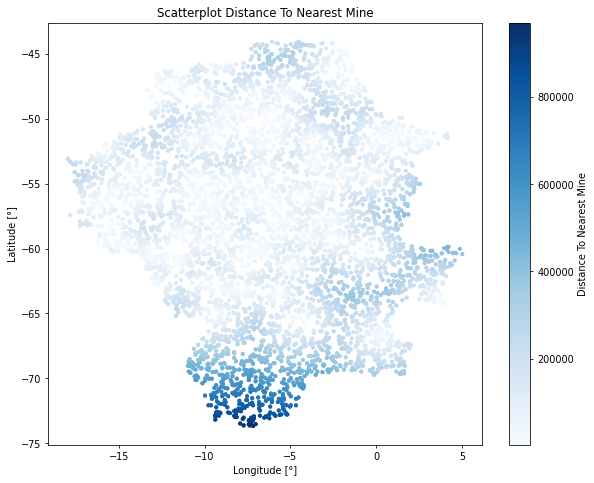

In [165]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['near_mines'], cmap = plt.get_cmap('Blues'))
plt.colorbar(label = 'Distance To Nearest Mine')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Distance To Nearest Mine')

### Elevation

Text(0.5, 1.0, 'Elevation Histogram')

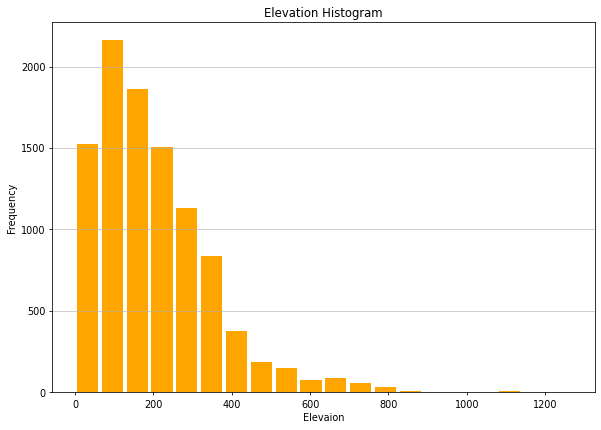

In [138]:
#Elevation scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['elevation'], bins = 20, color = 'orange', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Elevaion')
plt.ylabel('Frequency')
plt.title('Elevation Histogram')

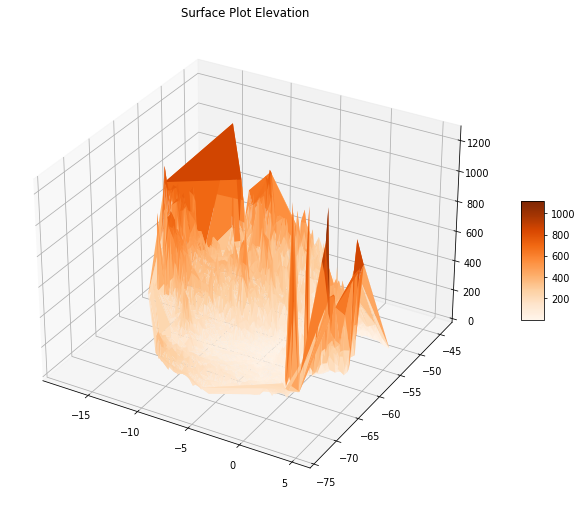

In [139]:

fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['elevation'], cmap = plt.get_cmap('Oranges'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Elevation')
 

plt.show()

Text(0.5, 1.0, 'Scatterplot Elevation')

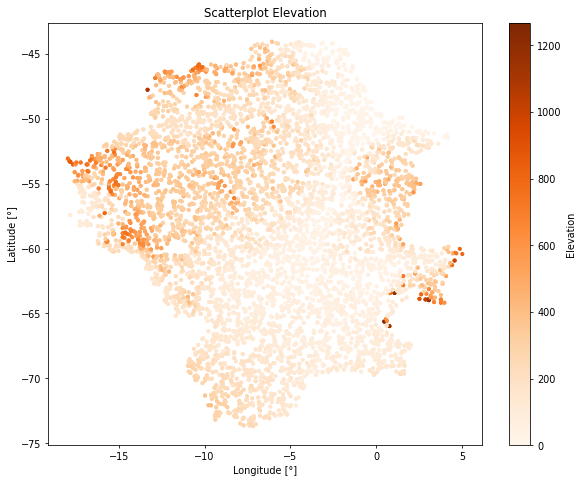

In [161]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['elevation'], cmap = plt.get_cmap('Oranges'))
plt.colorbar(label = 'Elevation')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Elevation')

### Rain

Text(0.5, 1.0, 'Rain Histogram')

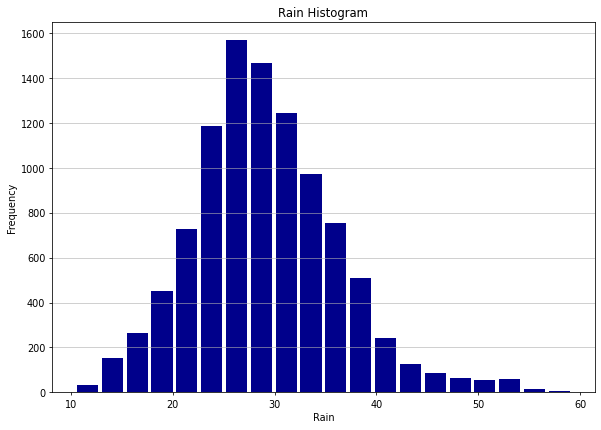

In [148]:
#Elevation scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['rain1'], bins = 20, color = 'darkblue', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.title('Rain Histogram')

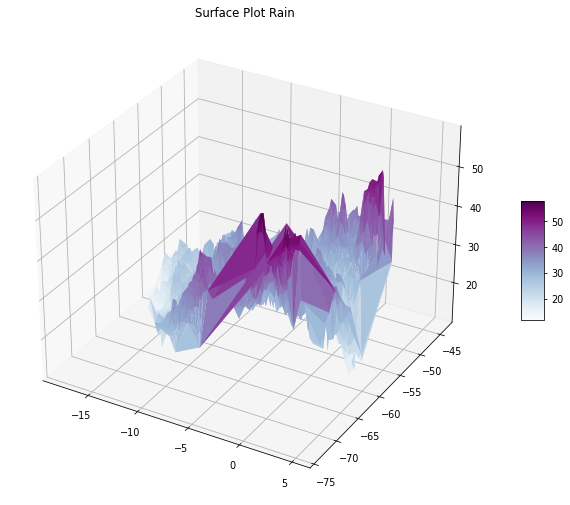

In [152]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['rain1'], cmap = plt.get_cmap('BuPu'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Rain')
 

plt.show()

Text(0.5, 1.0, 'Scatterplot Rain')

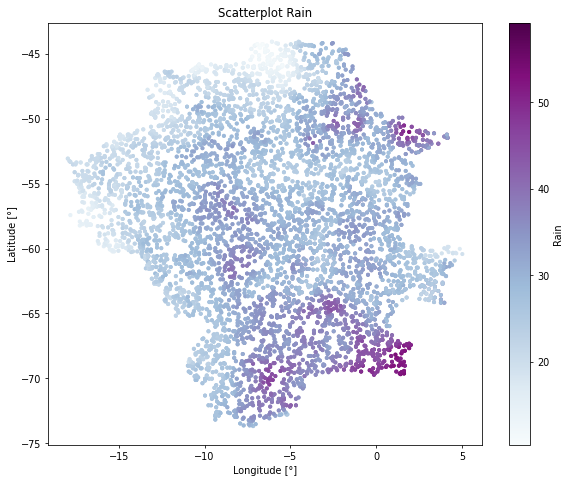

In [164]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['rain1'], cmap = plt.get_cmap('BuPu'))
plt.colorbar(label = 'Rain')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Rain')

### Indigenous Land

Text(0.5, 1.0, 'Indigenous Land Histogram')

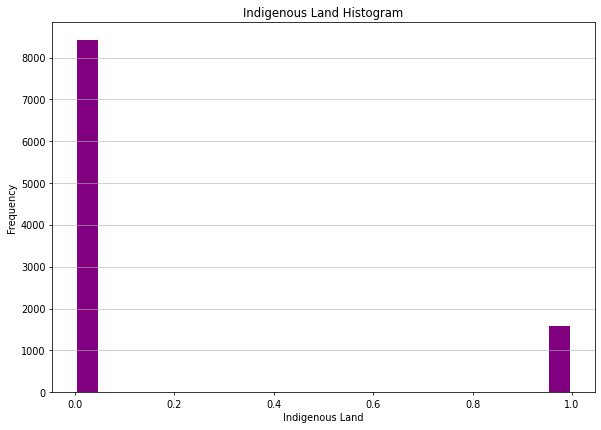

In [172]:
#Elevation scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['indigenous_homol'], bins = 20, color = 'purple', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Indigenous Land')
plt.ylabel('Frequency')
plt.title('Indigenous Land Histogram')

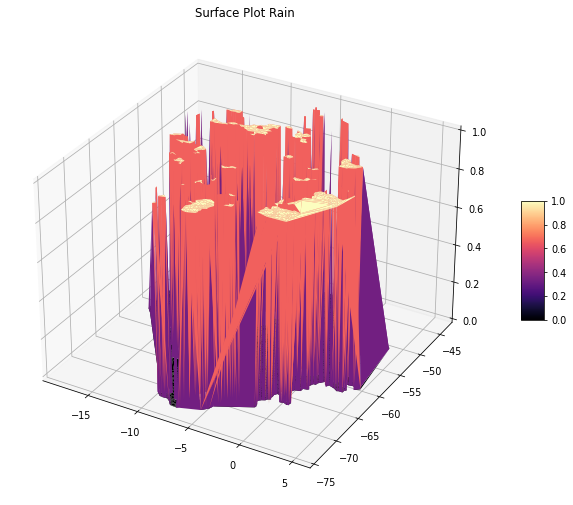

In [173]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['indigenous_homol'], cmap = plt.get_cmap('magma'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Indigenous Land')
plt.show()

Text(0.5, 1.0, 'Scatterplot Rain')

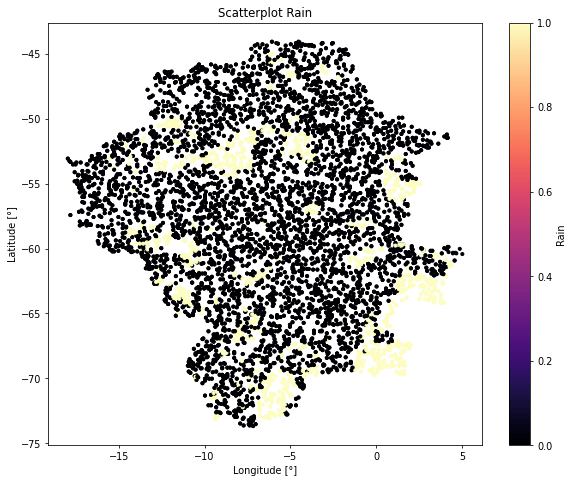

In [174]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['indigenous_homol'], cmap = plt.get_cmap('magma'))
plt.colorbar(label = 'Rain')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Indigenous Land')

### Population

Text(0.5, 1.0, 'Population Histogram')

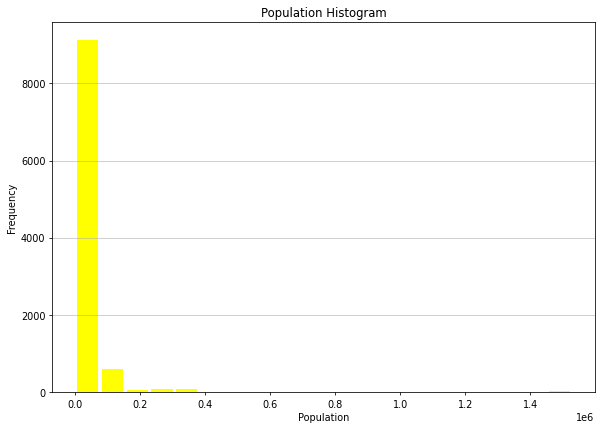

In [179]:
#Population scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['populacao'], bins = 20, color = 'yellow', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Population Histogram')

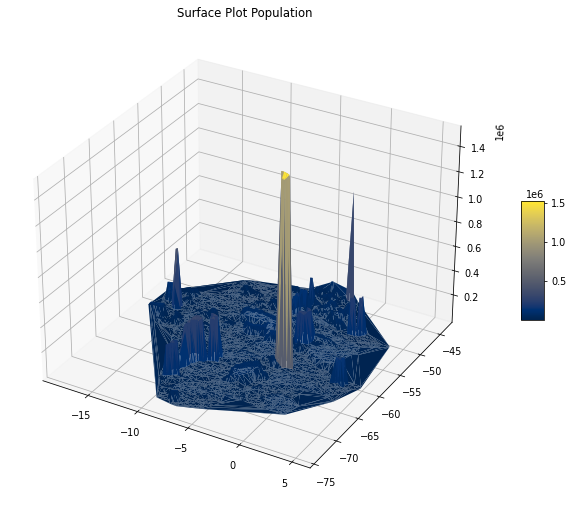

In [183]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['populacao'], cmap = plt.get_cmap('cividis'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Population')
plt.show()

Text(0.5, 1.0, 'Scatterplot Population')

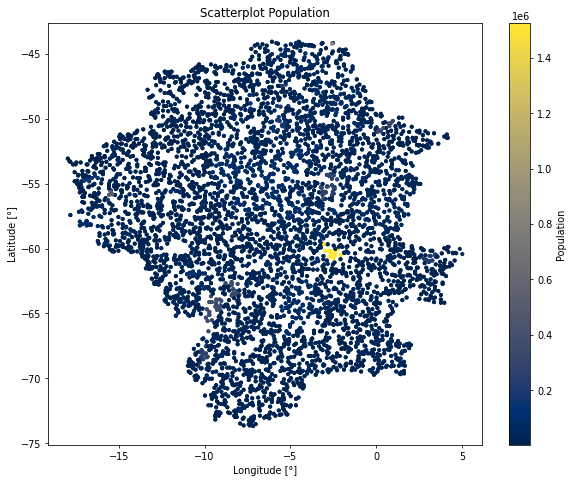

In [187]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['populacao'], cmap = plt.get_cmap('cividis'))
plt.colorbar(label = 'Population')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Population')

### Produces Iron Ore

Text(0.5, 1.0, 'Iron Ore Histogram')

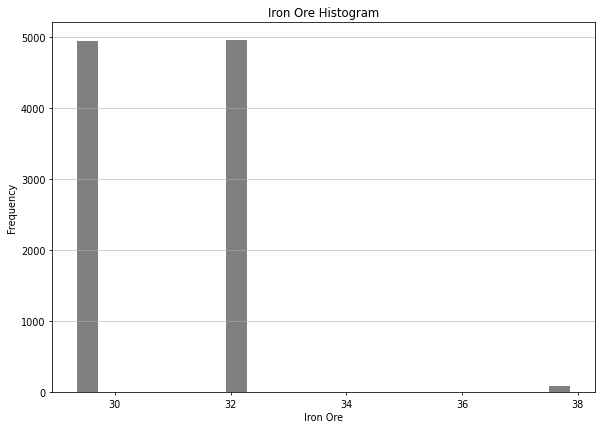

In [186]:
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['ironore'], bins = 20, color = 'grey', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Iron Ore')
plt.ylabel('Frequency')
plt.title('Iron Ore Histogram')

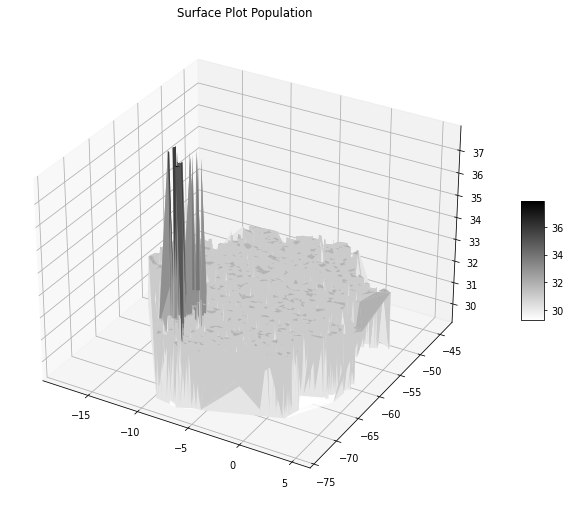

In [189]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['ironore'], cmap = plt.get_cmap('gist_gray_r'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Population')
plt.show()

Text(0.5, 1.0, 'Scatterplot Iron Ore')

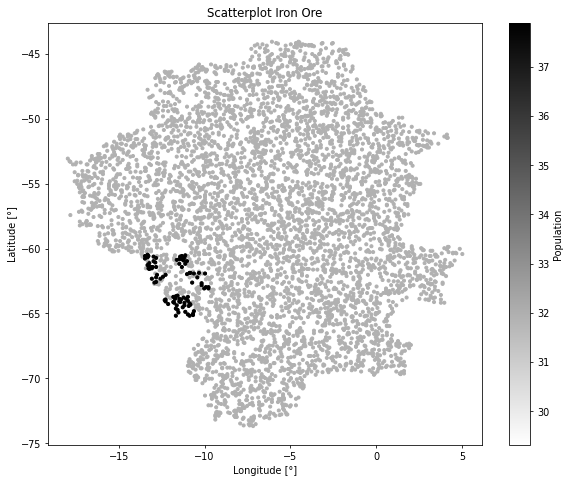

In [193]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['ironore'], cmap = plt.get_cmap('gist_gray_r'))
plt.colorbar(label = 'Population')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Iron Ore')

### Beef Price

In [ ]:
beef_price

Text(0.5, 1.0, 'Iron Ore Histogram')

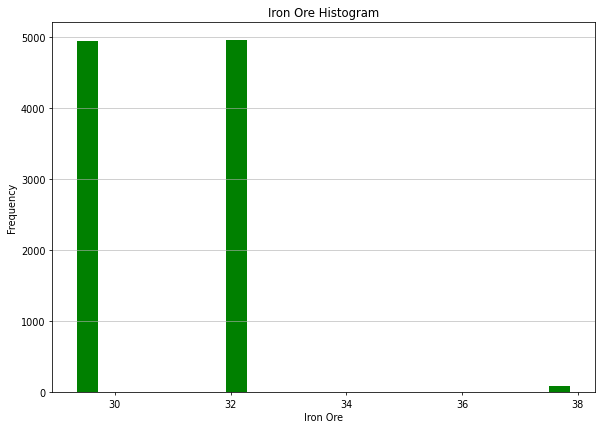

In [195]:
 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['ironore'], bins = 20, color = 'green', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Iron Ore')
plt.ylabel('Frequency')
plt.title('Iron Ore Histogram')

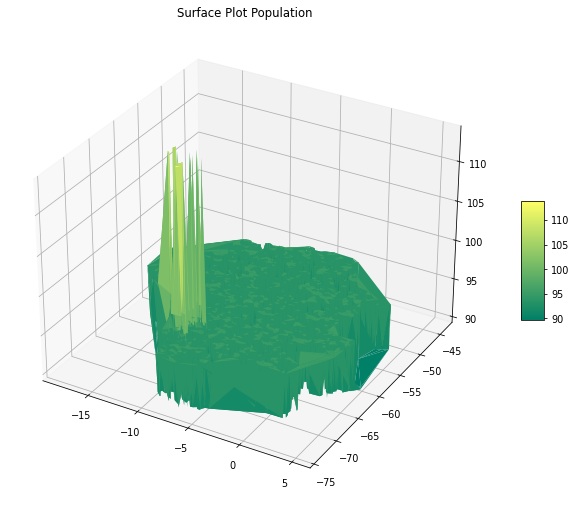

In [194]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['beef_price'], cmap = plt.get_cmap('summer'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Population')
plt.show()

Text(0.5, 1.0, 'Scatterplot Iron Ore')

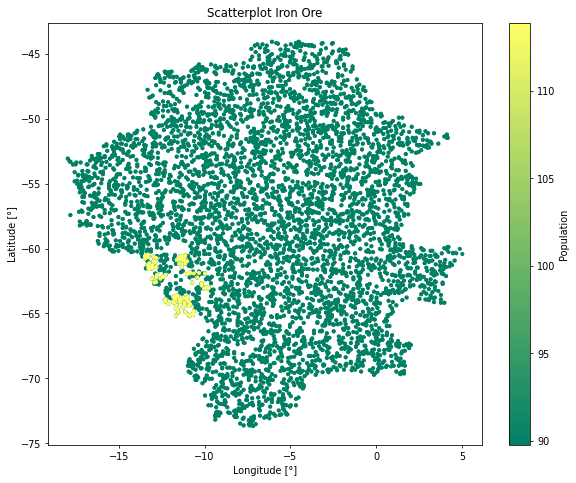

In [196]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['beef_price'], cmap = plt.get_cmap('summer'))
plt.colorbar(label = 'Population')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Iron Ore')

In [ ]:
### Agriculture Jobs

In [ ]:
ag_jobs

Text(0.5, 1.0, 'Agriculture Jobs Histogram')

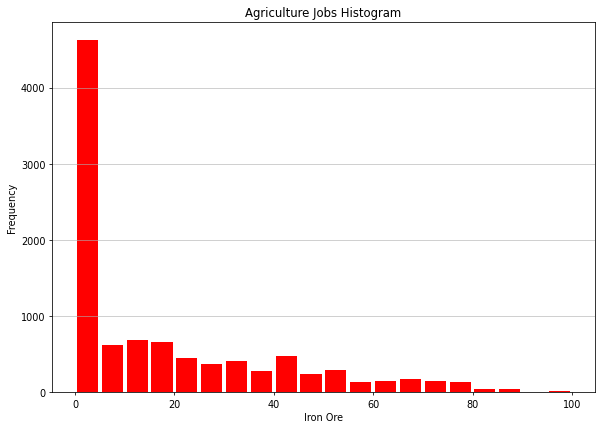

In [197]:
 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['ag_jobs'], bins = 20, color = 'red', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Iron Ore')
plt.ylabel('Frequency')
plt.title('Agriculture Jobs Histogram')

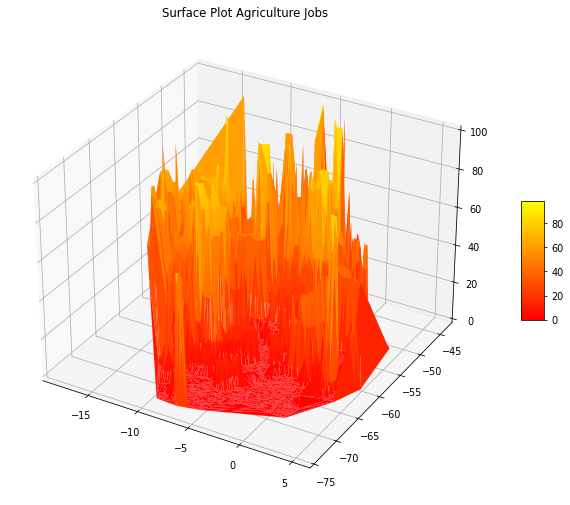

In [198]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['ag_jobs'], cmap = plt.get_cmap('autumn'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot Agriculture Jobs')
plt.show()

Text(0.5, 1.0, 'Scatterplot Agriculture Jobs')

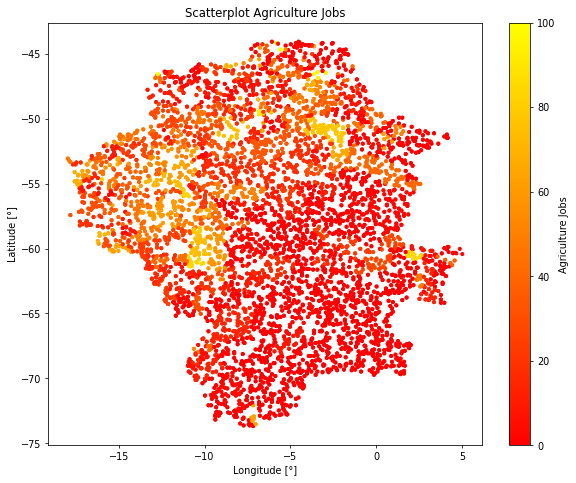

In [199]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['ag_jobs'], cmap = plt.get_cmap('autumn'))
plt.colorbar(label = 'Agriculture Jobs')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot Agriculture Jobs')

In [ ]:
### GDP Per Capita


In [ ]:
pib_pc

Text(0.5, 1.0, 'GDP Per Capita Histogram')

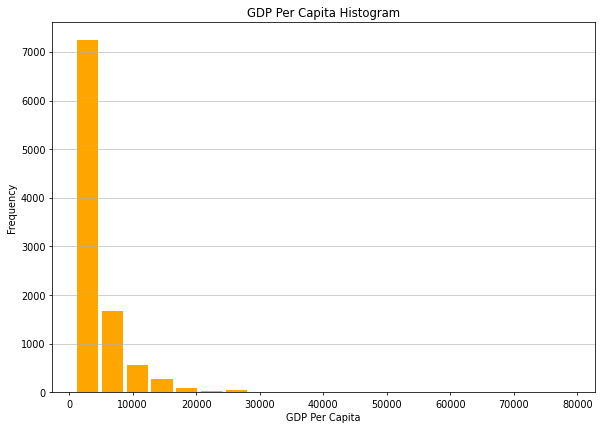

In [200]:
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['pib_pc'], bins = 20, color = 'orange', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.title('GDP Per Capita Histogram')

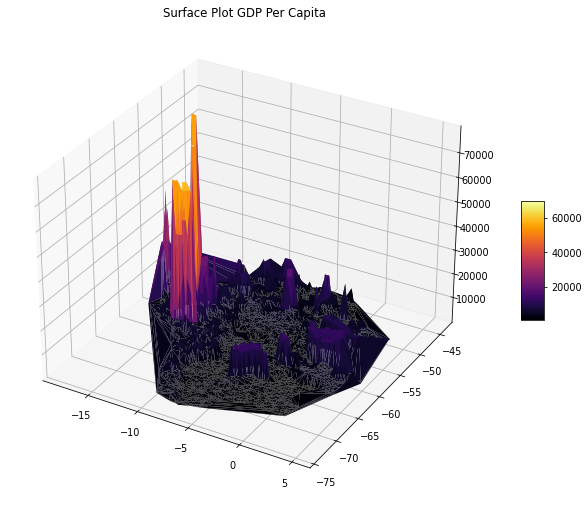

In [201]:
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['pib_pc'], cmap = plt.get_cmap('inferno'), linewidth = 0.2)
fig.colorbar(surf, ax = ax,shrink = 0.25, aspect = 5)
ax.set_title('Surface Plot GDP Per Capita')
plt.show()

Text(0.5, 1.0, 'Scatterplot GDP Per Capita')

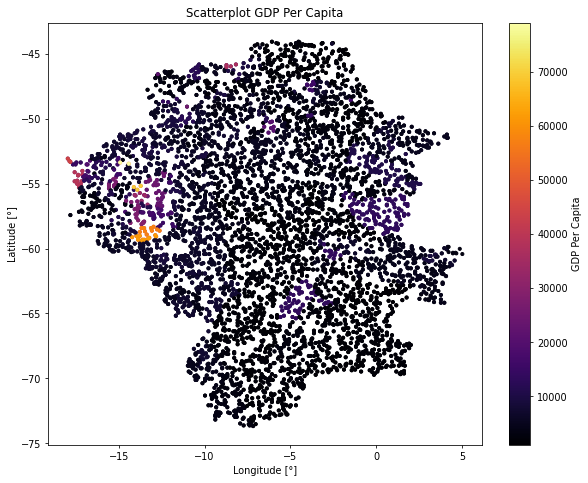

In [202]:
fig = plt.figure(figsize = (10, 8), dpi = 70)
plt.scatter(df['y'], df['x'], 10, df['pib_pc'], cmap = plt.get_cmap('inferno'))
plt.colorbar(label = 'GDP Per Capita')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Scatterplot GDP Per Capita')